In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import fipy as fp
from tqdm import trange

In [3]:
# Define domain size
nx, ny = 100, 100  # Grid resolution
Lx, Ly = 1.0, 1.0  # Physical domain size
dx, dy = Lx / nx, Ly / ny  # Cell size

In [4]:
# Create a 2D mesh
mesh = fp.Grid2D(dx=dx, dy=dy, nx=nx, ny=ny)

In [5]:
# Define variables
u = fp.CellVariable(name="concentration", mesh=mesh, value=0.0)

In [6]:
# Diffusion coefficient
D = 0.05  # Diffusivity

# Advection velocity
vx, vy = 0.2, 0.1  # Constant velocity in x and y directions
advectionCoeff = (vx, vy)

# Define the reaction rate constant
k = 0.1  # Reaction rate constant (can be adjusted)

In [7]:
# Define the PDE equation: ∂u/∂t + v · ∇u = D ∇²u - k u
eq = fp.TransientTerm() + fp.ConvectionTerm(advectionCoeff) - fp.DiffusionTerm(D) - k * u

In [15]:
# Initial condition: Gaussian pulse
X, Y = mesh.cellCenters
u.setValue(np.exp(-((X - 0.2) ** 2 + (Y - 0.1) ** 2) / 0.02))

In [16]:
# Time-stepping parameters
dt = 0.01  # Time step
t_final = 2.0  # Final time
n_steps = int(t_final / dt)  # Number of steps

In [17]:
t_steps = np.arange(0, t_final + dt, dt)

In [18]:
X, Y = mesh.cellCenters
X_grid = X.reshape((nx, ny))
Y_grid = Y.reshape((nx, ny))

results = np.zeros((n_steps + 1, nx, ny))
results[0] = u.value.reshape((nx, ny))

# Solve the PDE
for step in trange(n_steps):
    eq.solve(var=u, dt=dt)
    results[step + 1] = u.value.reshape((nx, ny)).copy()

100%|██████████| 200/200 [00:12<00:00, 15.46it/s]


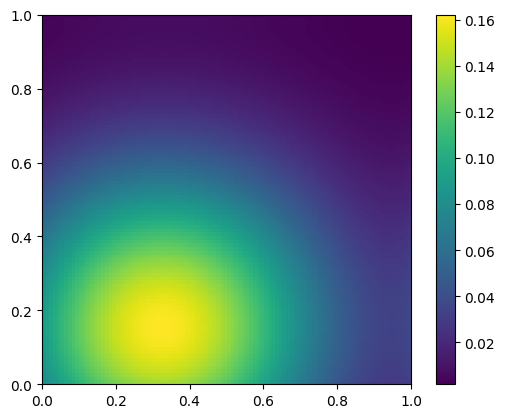

In [19]:
plt.imshow(results[80], origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()

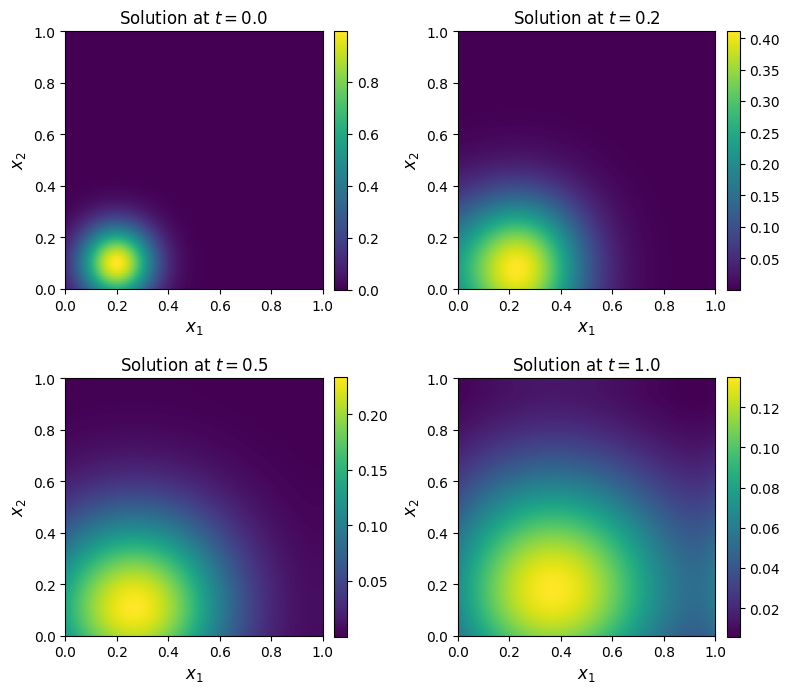

In [20]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 8))  # 2 rows, 2 columns
frame_ids = [0, 20, 50, 100]  # Example frame IDs for the subplots

# Loop over the axes and frame_ids to create each subplot
for i, ax in enumerate(axes.flat):
    # Assuming 'results' and 'adv_obj' are predefined
    im = ax.imshow(results[frame_ids[i]], origin='lower', extent=[0, 1, 0, 1])
    # Set title in LaTeX format
    ax.set_title(rf"Solution at $t = {t_steps[frame_ids[i]]}$", fontsize=12)
    
    # Add colorbar with shorter length
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)  # Shorter colorbar
    cbar.ax.tick_params(labelsize=10)  # Adjust the colorbar tick label font size
    
    # Add axis labels in LaTeX format
    ax.set_xlabel(r'$x_1$', fontsize=12)
    ax.set_ylabel(r'$x_2$', fontsize=12)

# Adjust layout to avoid overlap
plt.tight_layout(h_pad=-5.5)
plt.savefig("ADRSol.pdf", dpi=400)
# Show the plot
plt.show()


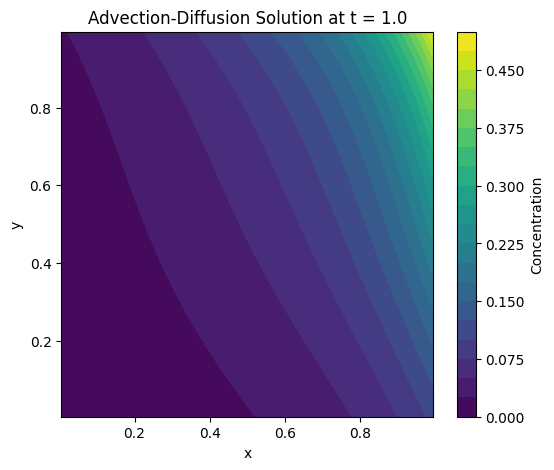

In [92]:
X, Y = mesh.cellCenters
plt.figure(figsize=(6, 5))
plt.tricontourf(X, Y, u.value, levels=20, cmap="viridis")
plt.colorbar(label="Concentration")
plt.title("Advection-Diffusion Solution at t = 1.0")
plt.xlabel("x")
plt.ylabel("y")
plt.show()